<a href="https://colab.research.google.com/github/GauthamMCU/Graph-handsOn/blob/main/Graph_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Theory Workshop Hands-On

#introduction
## Section


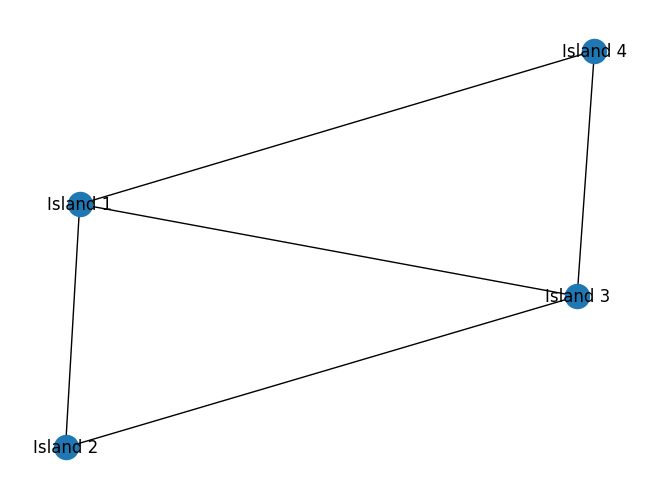

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([("Island 1","Island 2"),("Island 1","Island 3"),
                  ("Island 2","Island 3"),("Island 3","Island 4"),
                  ("Island 4","Island 1")])
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
$ x^2+y^2=a^2


#introduction
## section
### subsection



Graph Successfully Constructed!
Nodes (Cities): 8
Edges (Power Lines): 9


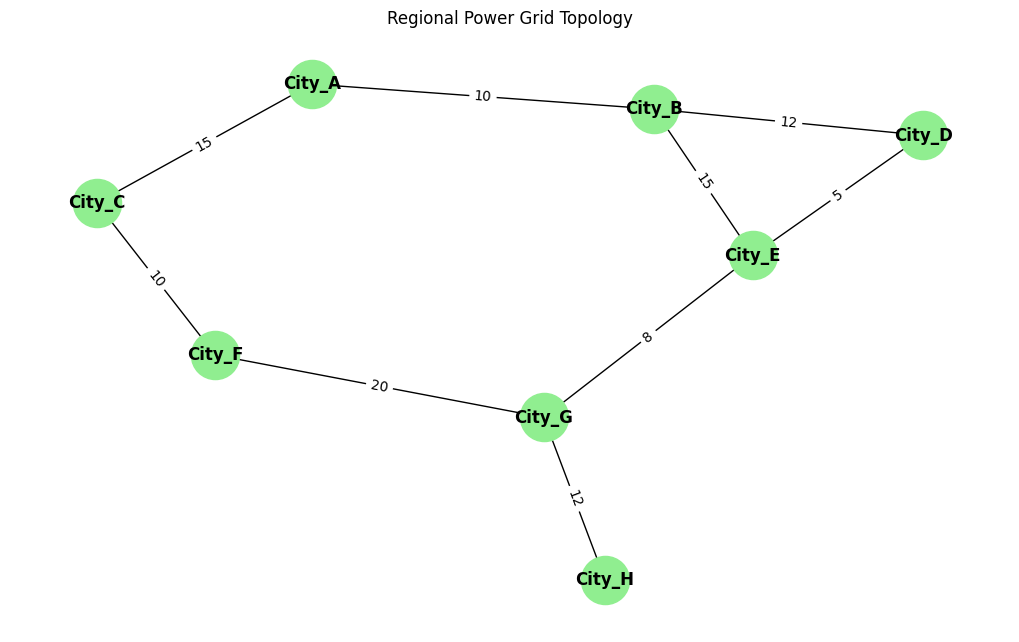

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# 1. Simulate a "Real-World" Dataset (e.g., imported from CSV)
data = {
    'Source': ['City_A', 'City_A', 'City_B', 'City_B', 'City_C', 'City_D', 'City_E', 'City_F', 'City_G'],
    'Target': ['City_B', 'City_C', 'City_D', 'City_E', 'City_F', 'City_E', 'City_G', 'City_G', 'City_H'],
    'Cost':   [10,       15,       12,       15,       10,       5,        8,        20,       12],  # Edge Weight
    'Type':   ['Fiber',  'Copper', 'Fiber',  'Copper', 'Fiber',  'Fiber',  'Copper', 'Fiber',  'Copper'] # Attribute
}

df = pd.DataFrame(data)

# 2. Construct the Graph directly from the DataFrame
# This is the industry-standard way to load graphs
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=['Cost', 'Type'])

print(f"Graph Successfully Constructed!")
print(f"Nodes (Cities): {G.number_of_nodes()}")
print(f"Edges (Power Lines): {G.number_of_edges()}")

# Quick Visualization
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1200, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'Cost'))
plt.title("Regional Power Grid Topology")
plt.show()

Total Network Cost: $107M
Optimized MST Cost: $72M
Savings: $35M


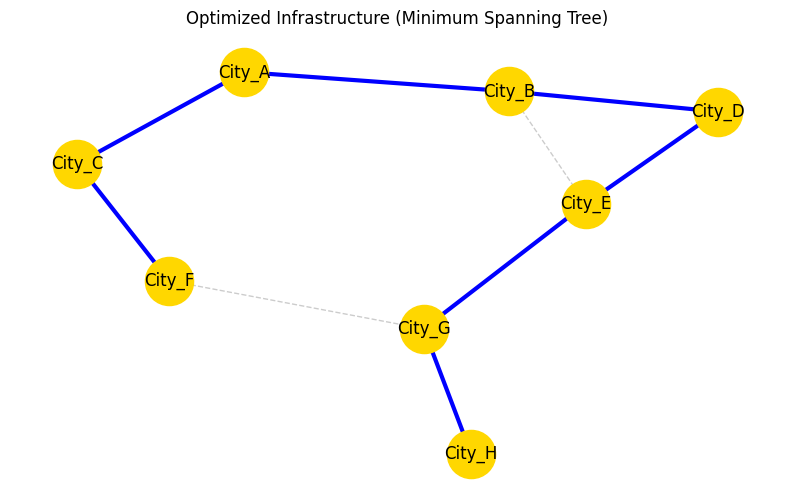

In [7]:
# Calculate the Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G, weight='Cost')

# Calculate Total Savings
total_cost = df['Cost'].sum()
mst_cost = sum(d['Cost'] for u, v, d in mst.edges(data=True))

print(f"Total Network Cost: ${total_cost}M")
print(f"Optimized MST Cost: ${mst_cost}M")
print(f"Savings: ${total_cost - mst_cost}M")

# Visualizing the MST vs Original Graph
plt.figure(figsize=(10, 6))
# Draw original faint edges
nx.draw_networkx_edges(G, pos, alpha=0.2, style='dashed')
# Draw MST edges boldly
nx.draw(mst, pos, with_labels=True, node_color='gold', node_size=1200, width=3, edge_color='blue')
plt.title("Optimized Infrastructure (Minimum Spanning Tree)")
plt.show()

In [8]:
# Compute Shortest Path
source, target = 'City_A', 'City_H'
path = nx.dijkstra_path(G, source, target, weight='Cost')
length = nx.dijkstra_path_length(G, source, target, weight='Cost')

print(f"Optimal Route from {source} to {target}: {path}")
print(f"Total Travel Cost: {length}")

Optimal Route from City_A to City_H: ['City_A', 'City_B', 'City_E', 'City_G', 'City_H']
Total Travel Cost: 45


--- Maintenance Schedule (Graph Colouring) ---
City_B: Day 1
City_E: Day 2
City_G: Day 1
City_A: Day 2
City_C: Day 1
City_D: Day 3
City_F: Day 2
City_H: Day 2

Minimum days required for full cycle: 3


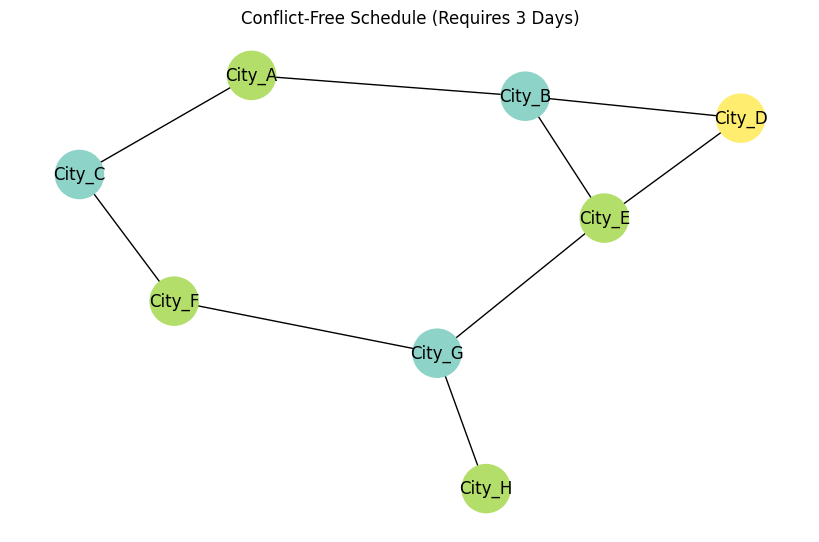

In [9]:
# Apply Greedy Coloring
strategies = nx.coloring.greedy_color(G, strategy='largest_first')

print("--- Maintenance Schedule (Graph Colouring) ---")
for node, color in strategies.items():
    print(f"{node}: Day {color + 1}")

# Calculate Chromatic Number (Min days needed)
min_days = max(strategies.values()) + 1
print(f"\nMinimum days required for full cycle: {min_days}")

# Visualizing the Schedule
colors = [strategies[n] for n in G.nodes()]
plt.figure(figsize=(8, 5))
nx.draw(G, pos, node_color=colors, cmap=plt.cm.Set3, with_labels=True, node_size=1200)
plt.title(f"Conflict-Free Schedule (Requires {min_days} Days)")
plt.show()

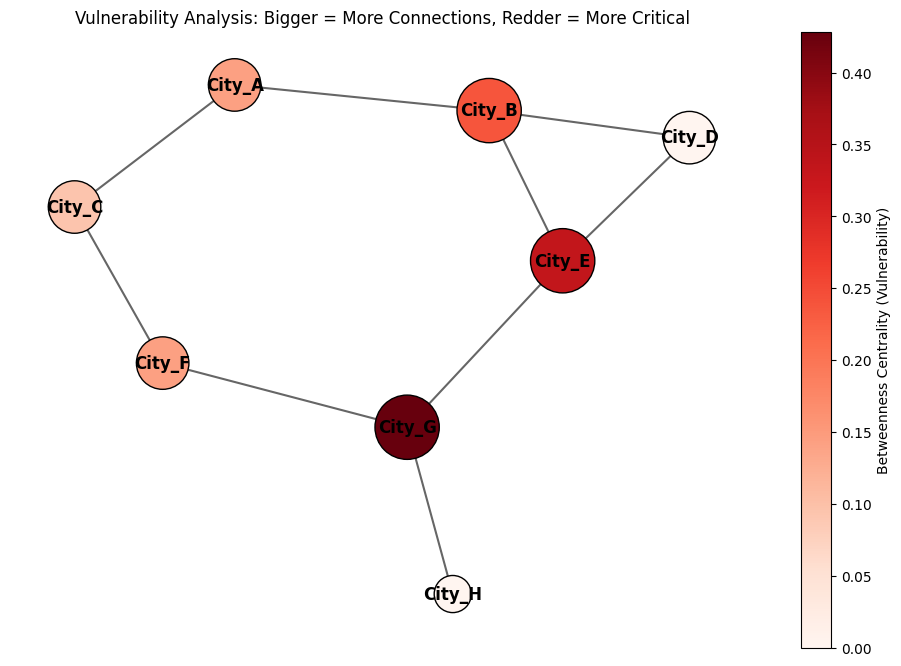

CRITICAL ALERT: City_G controls the highest flow in the network.


In [10]:
# 1. Compute Centralities
degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G, weight='Cost')

# 2. Advanced Visualization: Data-Driven Plotting
plt.figure(figsize=(12, 8))

# Get the current axes explicitly so we can refer to it later
ax = plt.gca()

# Size of node = Degree (How connected it is)
node_sizes = [v * 5000 for v in degree_cent.values()]

# Color of node = Betweenness (How critical it is)
node_colors = list(betweenness_cent.values())

# Draw the nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,
                               cmap=plt.cm.Reds, edgecolors='black', ax=ax)

# Draw edges and labels
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, ax=ax)
nx.draw_networkx_labels(G, pos, font_color='black', font_weight='bold', ax=ax)

# --- FIX START ---
# Create the ScalarMappable
vmin = min(node_colors)
vmax = max(node_colors)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Pass the 'ax' argument so matplotlib knows where to put the bar
plt.colorbar(sm, ax=ax, label="Betweenness Centrality (Vulnerability)")
# --- FIX END ---

plt.title("Vulnerability Analysis: Bigger = More Connections, Redder = More Critical")
plt.axis('off')
plt.show()

# Interpretative Output
critical_node = max(betweenness_cent, key=betweenness_cent.get)
print(f"CRITICAL ALERT: {critical_node} controls the highest flow in the network.")